<a href="https://colab.research.google.com/github/bcorr24/Final-Project-Data-301/blob/master/Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Visualizing MVP's and Allstar's

My goal was to find the best way to predict the MVP by looking at some of the Allstar's. I looked to make sure there has never been a MVP that wasn't an Allstar in the same season so I thought predicting MVP is reasonable to do from only the allstar's. 

In [0]:
import pandas as pd
import numpy as np
from matplotlib import cm
import pylab as pl
import matplotlib.pyplot as plt

In [16]:
from google.colab import drive
drive.mount('/content/gdrive')
full_data = pd.read_csv('/content/gdrive/My Drive/full_data.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
full_data["Position"].isna().value_counts()

False    1878
True       12
Name: Position, dtype: int64

In [0]:
#I looped over the season variable to get a decade 
decade = []
for i in range(len(full_data)):
  num = full_data.iloc[i]['Season']
  decade.append(int(num[2]))
full_data['decade'] = decade

#map the number to a decade
full_data['decade'] = full_data['decade'].map({
    5: "50's",
    6: "60's",
    7: "70's",
    8: "80's",
    9: "90's",
    0: "2000's",
    1: "2010's"
})

In [0]:
mvp_data = full_data[full_data['MVP'] == 1]

I first wanted to look into just the players who have won and MVP to understand some of the different aspects of former winners. My first idea was to look into some of the more general aspects like winner counts by team.  

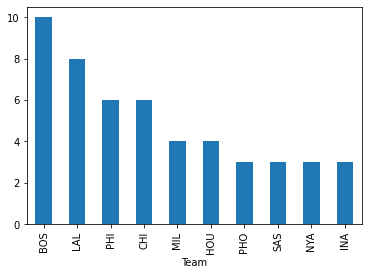

In [6]:
mvp_data.groupby("Team")["MVP"].sum().sort_values(ascending = False).head(10).plot.bar()

As you can see from the graph above the big market teams like Boston, the LA Lakers and the 76'ers have won the most. I think it is fair to say that the team you play for, especially if in a big market, may affect winning the award. 

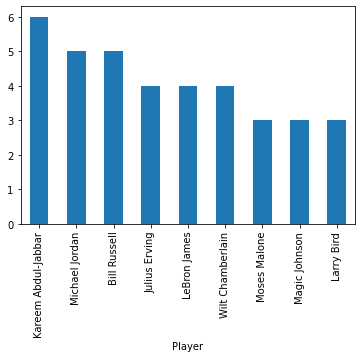

In [7]:
mvp_data.groupby("Player")["MVP"].sum().sort_values(ascending = False).head(9
                                                                  ).plot.bar()

I also looked at the top winners of the mvp. This is also a good indication of why some teams have alot of winners as some of the 

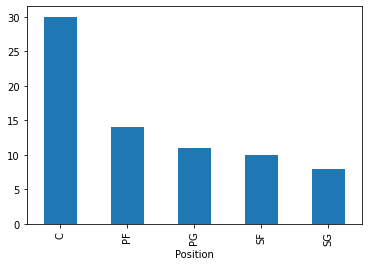

In [8]:
mvp_data.groupby("Position")["MVP"].sum().plot.bar()

Another thing I thought my be good to look into is the winners by positions. As you can see the center position was dominate and has won about double that of the next closest. The game however has changed in more recent years so I also wanted to take a look at a distribution over the decades.

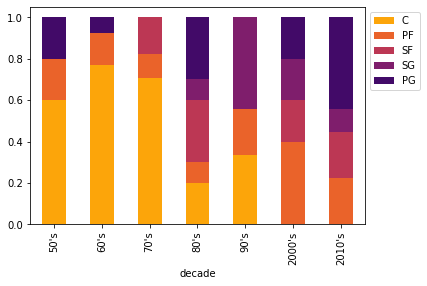

In [10]:
#group by position and decade
sub_df = mvp_data.groupby(['decade','Position'])['MVP'].sum().unstack()

#get percentages by decade
df_new = sub_df.T.apply(lambda x: x / x.sum())

#order them
df_new = df_new[["50's", "60's", "70's", "80's", "90's", "2000's", "2010's"]].T
df_new = df_new[["C", "PF", "SF", "SG", "PG"]]

#plot it
color = cm.inferno_r(np.linspace(.2, 15, 100))
df_new.plot(kind='bar',stacked=True, legend = False, color=color).legend(
    bbox_to_anchor=(1, 1))

As you can see from this plot, the 50's, 60's and 70's are all dominated by centers. As you progress you can see a progression towards a more even spread between gaurds and bigs. 

I also wanted to look at the overall stats for all stars so next I looked at some boxplots of some of the quantitative categories. I first looked at the distribution of these stats by decade to look for any changes. 

[Text(0, 0, "50's"),
 Text(0, 0, "60's"),
 Text(0, 0, "70's"),
 Text(0, 0, "80's"),
 Text(0, 0, "90's"),
 Text(0, 0, "2000's"),
 Text(0, 0, "2010's")]

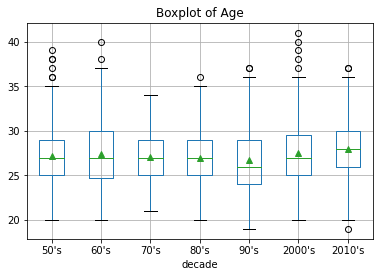

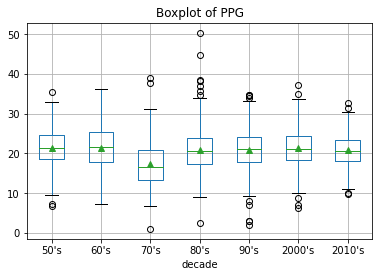

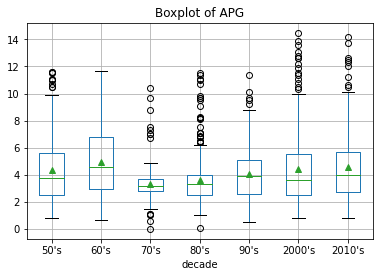

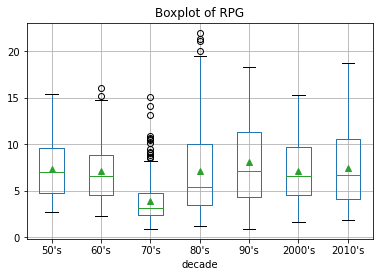

In [11]:
order = ["50's", "60's", "70's", "80's", "90's", "2000's", "2010's"]
ax = full_data.boxplot(column=['Age'],
                by="decade",
                showfliers=True, showmeans=True)
plt.suptitle("")
plt.title("Boxplot of Age")
ax.set_xticklabels(order)

ax = full_data.boxplot(column=['ppg'],
                by="decade",
                showfliers=True, showmeans=True)
plt.suptitle("")
plt.title("Boxplot of PPG")
ax.set_xticklabels(order)


ax = full_data.boxplot(column=['apg'],
                by="decade",
                showfliers=True, showmeans=True)
plt.suptitle("")
plt.title("Boxplot of APG")
ax.set_xticklabels(order)


ax = full_data.boxplot(column=['rpg'],
                by="decade",
                showfliers=True, showmeans=True)
plt.suptitle("")
plt.title("Boxplot of RPG")
ax.set_xticklabels(order)

As you can see from the boxplots above, there doesn't seem to be a significant change in overall stats over the span of decades. Using these variables would probably be good in my model as they won't change over different years. Just to be sure I will look at the same kind of plot for the winners of the MVP. 

[Text(0, 0, "50's"),
 Text(0, 0, "60's"),
 Text(0, 0, "70's"),
 Text(0, 0, "80's"),
 Text(0, 0, "90's"),
 Text(0, 0, "2000's"),
 Text(0, 0, "2010's")]

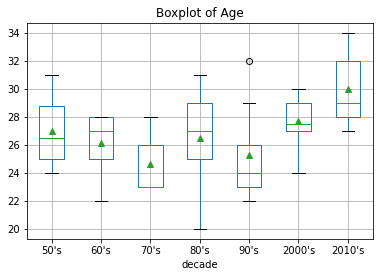

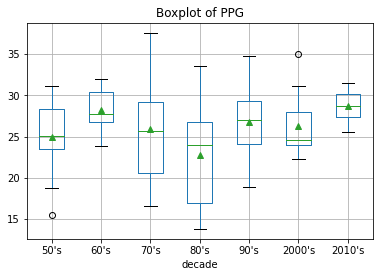

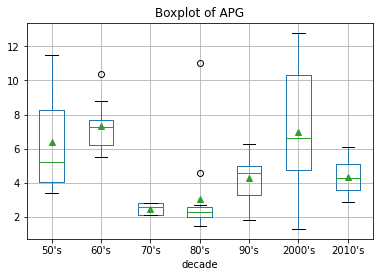

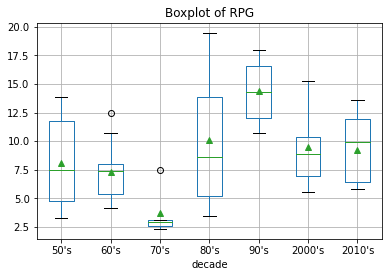

In [12]:
order = ["50's", "60's", "70's", "80's", "90's", "2000's", "2010's"]
ax = mvp_data.boxplot(column=['Age'],
                by="decade",
                showfliers=True, showmeans=True)
plt.suptitle("")
plt.title("Boxplot of Age")
ax.set_xticklabels(order)

ax = mvp_data.boxplot(column=['ppg'],
                by="decade",
                showfliers=True, showmeans=True)
plt.suptitle("")
plt.title("Boxplot of PPG")
ax.set_xticklabels(order)


ax = mvp_data.boxplot(column=['apg'],
                by="decade",
                showfliers=True, showmeans=True)
plt.suptitle("")
plt.title("Boxplot of APG")
ax.set_xticklabels(order)


ax = mvp_data.boxplot(column=['rpg'],
                by="decade",
                showfliers=True, showmeans=True)
plt.suptitle("")
plt.title("Boxplot of RPG")
ax.set_xticklabels(order)

Much like there is a noticable trend in any of these graphs except age and ppg seem to increase a little bit. 